In [5]:
#Importando principais Bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [6]:
#Importando os dados de Alunos_pap da aula
alunos_pap = pd.read_csv('dados/alunos_pap.csv', sep=';', index_col = 0)
alunos_pap

,Matematica,Portugues
Aluno,,
Dri,9,7
Li,5,4
Bru,6,6
Mi,10,8
Re,4,4
Ze,4,9


In [7]:
#Criando a matriz de distância. 
##Pdist = Função que cria um array condensado das distancias entre os pontos
##Squareform = Transforma esse array em uma matriz quadrada
##DataFrame = Uso o Datafram pra transformar a matriz em um DF e nomear as colunas e índices

from scipy.spatial.distance import pdist, squareform

d= squareform(pdist(alunos_pap), 'euclidean')
distmatrix = pd.DataFrame(d, index = alunos_pap.index, columns = alunos_pap.index )

distmatrix

Aluno,Dri,Li,Bru,Mi,Re,Ze
Aluno,,,,,,
Dri,0.000000,5.000000,3.162278,1.414214,5.830952,5.385165
Li,5.000000,0.000000,2.236068,6.403124,1.000000,5.099020
Bru,3.162278,2.236068,0.000000,4.472136,2.828427,3.605551
Mi,1.414214,6.403124,4.472136,0.000000,7.211103,6.082763
Re,5.830952,1.000000,2.828427,7.211103,0.000000,5.000000
Ze,5.385165,5.099020,3.605551,6.082763,5.000000,0.000000


In [8]:
#Importando bibliotecas de para criação de dendrogramas
## from scipy.cluster.hierarchy import dendrogram = usada para criar a função de plot do dendrograma
## from sklearn.cluster import AgglomerativeClustering  = Biblioteca para criar o dendrograma

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering 

## Cada modelo é um dendrograma usando um linkage diferente
model_single = AgglomerativeClustering(distance_threshold = 0, n_clusters = None, linkage = 'single')
model_complete = AgglomerativeClustering(distance_threshold = 0, n_clusters = None, linkage = 'complete')
model_average = AgglomerativeClustering(distance_threshold = 0, n_clusters = None, linkage = 'average')
model_ward = AgglomerativeClustering(distance_threshold = 0, n_clusters = None, linkage = 'ward')

model_single.fit(alunos_pap)
model_complete.fit(alunos_pap)
model_average.fit(alunos_pap)
model_ward.fit(alunos_pap)


AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [9]:
#Função para plot do dendrograma
##QUEM SOUBER UM MÉTODO MAIS FÁCIL, ME DIZ POR FAVOR!
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

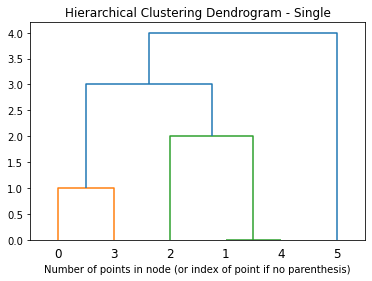

In [27]:
#Plot do Dendrograma Single Linkage
plot_dendrogram(model_single, truncate_mode='level')
plt.title('Hierarchical Clustering Dendrogram - Single')
plt.xlabel("Number of points in node (or index of point if no parenthesis)")
plt.show()

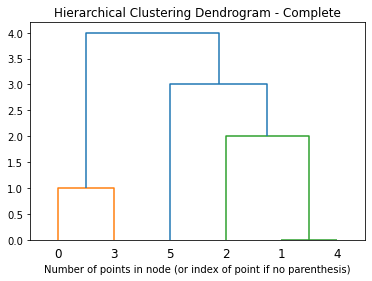

In [11]:
#Plot do Dendrograma Complete Linkage
plt.title('Hierarchical Clustering Dendrogram - Complete')
plot_dendrogram(model_complete, truncate_mode='level')
plt.xlabel("Number of points in node (or index of point if no parenthesis)")
plt.show()

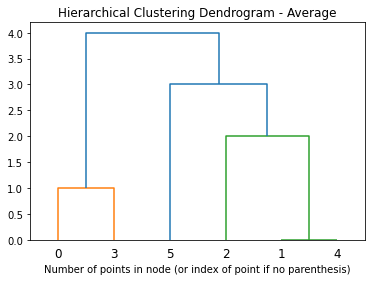

In [12]:
#Plot do Dendrograma Average Linkage
plt.title('Hierarchical Clustering Dendrogram - Average')
plot_dendrogram(model_average, truncate_mode='level')
plt.xlabel("Number of points in node (or index of point if no parenthesis)")
plt.show()

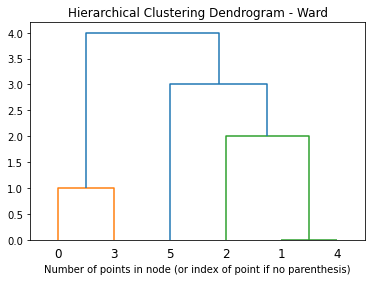

In [13]:
#Plot do Dendrograma Ward Linkage
plt.title('Hierarchical Clustering Dendrogram - Ward')
plot_dendrogram(model_ward, truncate_mode='level')
plt.xlabel("Number of points in node (or index of point if no parenthesis)")
plt.show()

In [14]:
#Cortando a árvore para criar os grupos
## from scipy.cluster.hierarchy import linkage = diz o linkage usado para cortar os grupos

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree
hc_ward = linkage(alunos_pap, 'ward')
grupo_alunos = cut_tree(hc_ward,n_clusters = 2)

grupo_alunos_df = pd.DataFrame(grupo_alunos, index = alunos_pap.index, columns = ['Grupos'])
grupo_alunos_df

,Grupos
Aluno,
Dri,0
Li,1
Bru,1
Mi,0
Re,1
Ze,1


In [15]:
alunos_pap['grupo'] = grupo_alunos_df
alunos_pap

,Matematica,Portugues,grupo
Aluno,,,
Dri,9,7,0
Li,5,4,1
Bru,6,6,1
Mi,10,8,0
Re,4,4,1
Ze,4,9,1


In [16]:
#Entendendo as informacoes de cada grupo
alunos_pap_1 = alunos_pap[alunos_pap['grupo'] == 1]
alunos_pap_0 = alunos_pap[alunos_pap['grupo'] == 0]


In [17]:
alunos_pap_1.describe()

,Matematica,Portugues,grupo
count,4.000000,4.000000,4.0
mean,4.750000,5.750000,1.0
std,0.957427,2.362908,0.0
min,4.000000,4.000000,1.0
25%,4.000000,4.000000,1.0
50%,4.500000,5.000000,1.0
75%,5.250000,6.750000,1.0
max,6.000000,9.000000,1.0


In [18]:
alunos_pap_0.describe()

,Matematica,Portugues,grupo
count,2.000000,2.000000,2.0
mean,9.500000,7.500000,0.0
std,0.707107,0.707107,0.0
min,9.000000,7.000000,0.0
25%,9.250000,7.250000,0.0
50%,9.500000,7.500000,0.0
75%,9.750000,7.750000,0.0
max,10.000000,8.000000,0.0
